# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [5]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

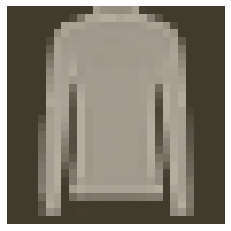

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [11]:
# TODO: Define your network architecture here
from collections import OrderedDict
from torch import nn

input_size = 784
hidden_sizes = [256, 128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([('fc1', nn.Linear(input_size, hidden_sizes[0])),
                                   ('relu1', nn.ReLU()),
                                   ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                                   ('relu2', nn.ReLU()),
                                   ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                                   ('relu3', nn.ReLU()),
                                   ('output', nn.Linear(hidden_sizes[2], output_size)),
                                   ('logSoftmax', nn.LogSoftmax(dim = 1))]))
model
                                   

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [13]:
from torch import optim
# TODO: Create the network, define the criterion and optimizer
# We defined the network above

# Criterion: We use the negative log likelihood as our output is logSoftMax
criterion = nn.NLLLoss()

# We just pick an optimizer - Adam optimizer is widely used
# We give it a learning rate as well as the parameters of the model
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [14]:
# TODO: Train the network here

# Now that the model is defined, we can finally start traning

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # As we did for the numbers, we flatten the images
        images = images.view(images.shape[0], -1)
        
        # We reset the gradients every time
        optimizer.zero_grad()
        
        # 1. Make a forward pass thorugh the network
        output = model(images)
        
        # 2. Use the logits to calculate the loss
        # We use the computed logits from our output
        loss = criterion(output, labels)
        
        # 3. Perform a backward pass through the network with loss.backward() to calculate the gradients
        loss.backward()
        
        # 4. Take a step with the optimizer to update the weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5819635898160782
Training loss: 0.457981066027684
Training loss: 0.42574071091438914
Training loss: 0.4074552303342931
Training loss: 0.4191979337126207
Training loss: 0.4034139789593245
Training loss: 0.3925113674801296
Training loss: 0.38322397404864655
Training loss: 0.38553826312329975
Training loss: 0.3906914574314536


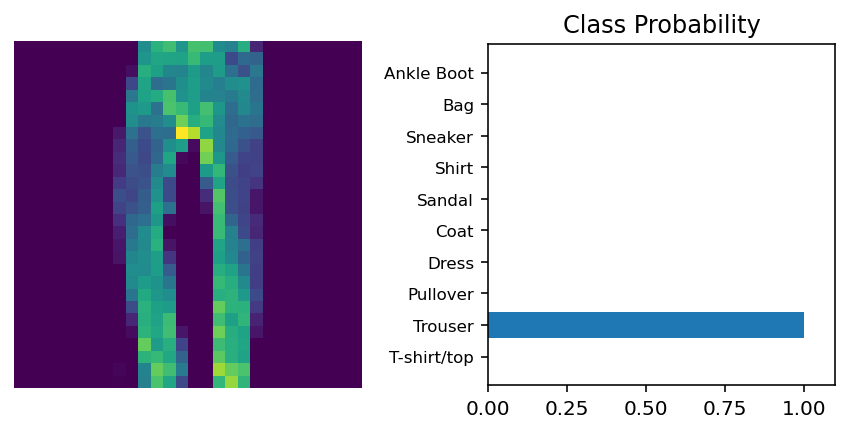

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logps = model(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')